# Project: Sales Performance Analysis  
### Business Requirements:  
Objective: Analyze sales data to provide insights into the performance of different products, regions, and sales representatives.  
### Key Questions to Answer:  
What are the total sales and the number of units sold for each product?  
Which products are the top performers and which are underperforming?  
How do sales vary across different regions?  
Are there any noticeable trends or seasonality in the sales data?  
Provide recommendations for improving sales based on your analysis.  

In [2]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import sales data into dataframe
sales = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales.shape

(2823, 25)

We first explore data to find any issues including NULL values, duplicates, typos, outliers.

In [5]:
sales.ADDRESSLINE2.isna().sum()

2521

In [6]:
sales.ADDRESSLINE2.value_counts()

ADDRESSLINE2
Level 3        55
Suite 400      48
Level 6        46
Level 15       46
2nd Floor      36
Suite 101      25
Suite 750      20
Floor No. 4    16
Suite 200      10
Name: count, dtype: int64

In [7]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Since majority of ADDRESSLINE2 has NaN values and we aren't interested in analysing address, just region, we will  
get rid of address columns. Also same goes for state, postcode and territory. If we know city we can infer those values anyways. Customer phone number is also irrelevant  
for business requirements so we drop that column.

In [8]:
sales = sales.drop(['ADDRESSLINE1',	'ADDRESSLINE2','STATE', 'TERRITORY', 'POSTALCODE','PHONE' ],axis=1)
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium


In [9]:
#Next look for duplicates
sales.duplicated().sum()

0

In [10]:
#Look for typos by analysing each of main string column
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [11]:
#convert order date to date format
sales.ORDERDATE = pd.to_datetime(sales.ORDERDATE)

In [12]:
sales.STATUS.value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [13]:
sales.PRODUCTLINE.value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [14]:
sales.DEALSIZE.value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

In [15]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium


In [16]:
#Time to begin preliminary EDA
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


We can look to answer first question now:  
What are the total sales and the number of units sold for each product?

In [58]:
#Here we group Productcode by sum of sales and quantity ordered.
product_sales = sales.groupby('PRODUCTCODE').agg({'SALES': 'sum', 'QUANTITYORDERED':'sum'}).reset_index()
product_sales

,PRODUCTCODE,SALES,QUANTITYORDERED
0,S10_1678,97107.00,944
1,S10_1949,191073.03,961
2,S10_2016,106017.46,928
3,S10_4698,170401.07,921
4,S10_4757,113093.73,952
...,...,...,...
104,S700_3505,88565.41,917
105,S700_3962,80482.72,852
106,S700_4002,76175.63,1029
107,S72_1253,51661.82,920


In [79]:
product_sales.to_csv('Product Sales.csv', index=False)

In [31]:
top_products = product_sales.sort_values(by='SALES', ascending=False)
top_products['Product line'] = sales['PRODUCTLINE']
top_products.head(10)

,PRODUCTCODE,SALES,QUANTITYORDERED,Product line
39,S18_3232,288245.42,1774,Classic Cars
1,S10_1949,191073.03,961,Motorcycles
3,S10_4698,170401.07,921,Motorcycles
7,S12_1108,168585.32,973,Motorcycles
25,S18_2238,154623.95,966,Motorcycles
12,S12_3891,145332.04,921,Motorcycles
76,S24_3856,140626.90,1052,Motorcycles
9,S12_2823,140006.16,964,Motorcycles
21,S18_1662,139421.97,940,Motorcycles
6,S12_1099,137177.01,838,Motorcycles


In [32]:
bottom_products = product_sales.sort_values(by='SALES', ascending=True)
bottom_products['Product line'] = sales['PRODUCTLINE']
bottom_products.head(10)

,PRODUCTCODE,SALES,QUANTITYORDERED,Product line
78,S24_3969,33181.66,745,Motorcycles
85,S32_2206,41353.43,836,Motorcycles
62,S24_2022,44667.16,851,Motorcycles
69,S24_2972,46515.92,912,Motorcycles
57,S24_1628,46676.51,883,Motorcycles
66,S24_2840,47235.48,983,Motorcycles
59,S24_1937,47981.09,844,Motorcycles
91,S50_1341,50217.95,999,Motorcycles
107,S72_1253,51661.82,920,Classic Cars
19,S18_1367,52045.03,890,Motorcycles


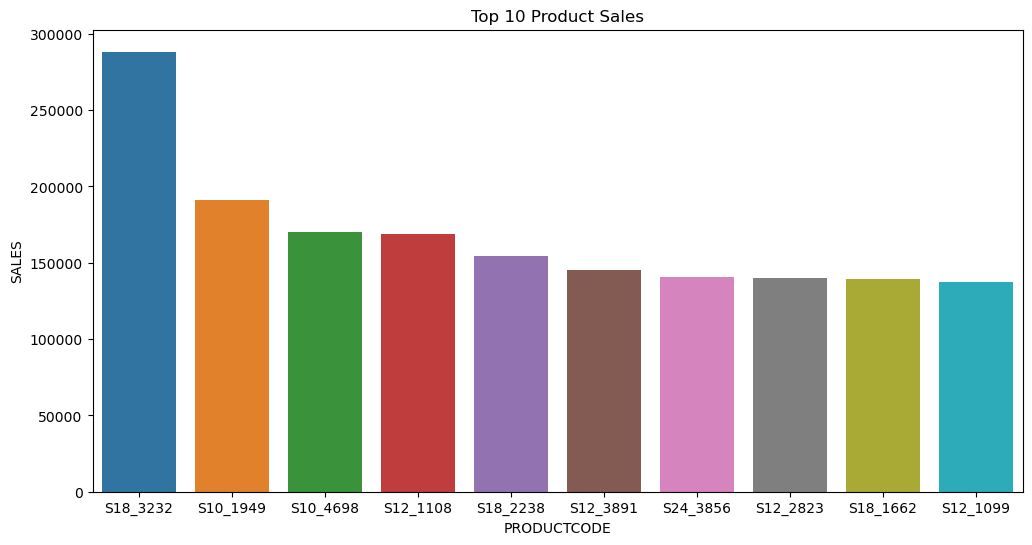

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='PRODUCTCODE', y='SALES', data = top_products.head(10))
plt.title('Top 10 Product Sales')
plt.show()

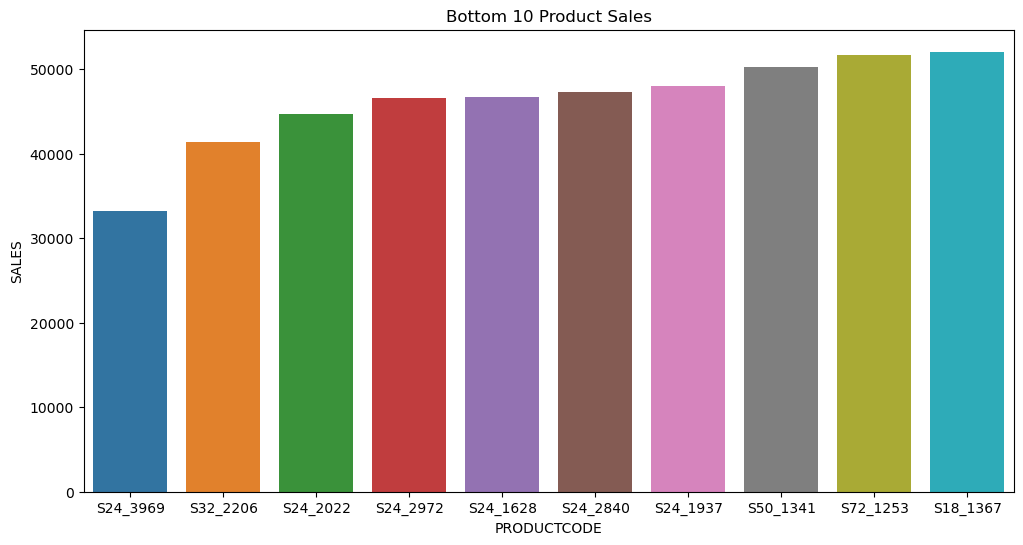

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='PRODUCTCODE', y='SALES', data = bottom_products.head(10))
plt.title('Bottom 10 Product Sales')
plt.show()

Here we have found the product codes for the top and bottom 10 by sales. To find  
the names we match productcodes with names in inventory, which was not given in  
this data set.  
Next we look at 'How do sales vary across different regions?'

In [78]:
regions = sales.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values(by='SALES',ascending = False)
regions.head(10).reset_index().drop(['index'],axis=1)

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


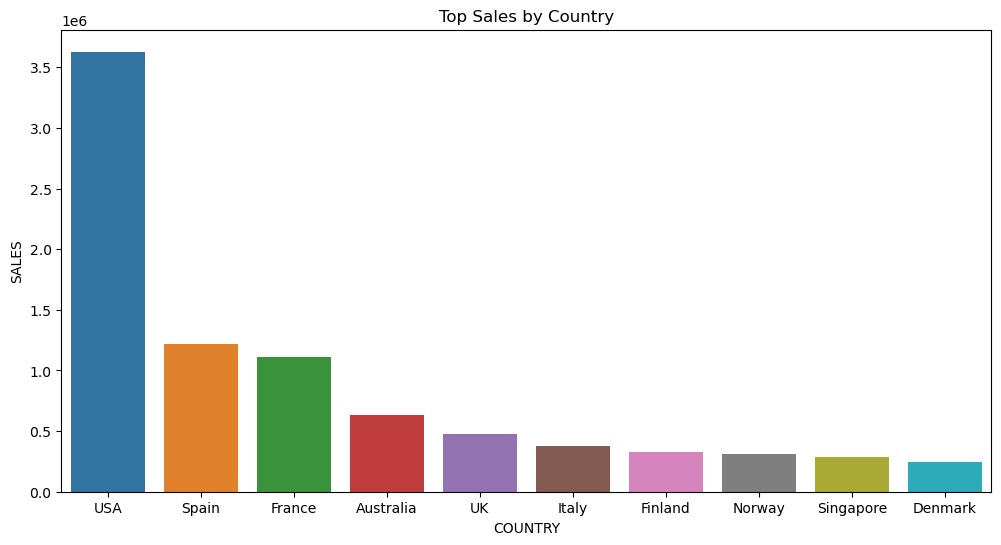

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'COUNTRY', y='SALES', data=regions.head(10))
plt.title('Top Sales by Country')
plt.show()

In [62]:
country_sales = sales[sales.COUNTRY== 'USA']
top_cities = country_sales.groupby('CITY')['SALES'].sum().reset_index().sort_values(['SALES'], ascending = False)
top_cities['COUNTRY'] = regions.iloc[0, 0]
top_cities.head()

,CITY,SALES,COUNTRY
21,San Rafael,654858.06,USA
11,NYC,560787.77,USA
19,San Francisco,224358.68,USA
13,New Bedford,207874.86,USA
2,Brickhaven,165255.20,USA


In [63]:
country_sales = sales[sales.COUNTRY== regions.iloc[1,0]]
top_cities1 = country_sales.groupby('CITY')['SALES'].sum().reset_index().sort_values(['SALES'], ascending = False)
top_cities1['COUNTRY'] = regions.iloc[1, 0]
top_cities1

,CITY,SALES,COUNTRY
1,Madrid,1082551.44,Spain
0,Barcelona,78411.86,Spain
2,Sevilla,54723.62,Spain


In [64]:
country_sales = sales[sales.COUNTRY== regions.iloc[2,0]]
top_cities2 = country_sales.groupby('CITY')['SALES'].sum().reset_index().sort_values(['SALES'], ascending = False)
top_cities2['COUNTRY'] = regions.iloc[2, 0]
top_cities2.head()

,CITY,SALES,COUNTRY
4,Paris,268944.68,France
3,Nantes,204304.86,France
1,Lyon,142874.25,France
5,Reims,135042.94,France
6,Strasbourg,80438.48,France


In [65]:
country_sales = sales[sales.COUNTRY== regions.iloc[3,0]]
top_cities3 = country_sales.groupby('CITY')['SALES'].sum().reset_index().sort_values(['SALES'], ascending = False)
top_cities3['COUNTRY'] = regions.iloc[3, 0]
top_cities3

,CITY,SALES,COUNTRY
2,Melbourne,200995.41,Australia
3,North Sydney,153996.13,Australia
0,Chatswood,151570.98,Australia
1,Glen Waverly,64591.46,Australia
4,South Brisbane,59469.12,Australia


In [66]:
country_sales = sales[sales.COUNTRY== regions.iloc[4,0]]
top_cities4 = country_sales.groupby('CITY')['SALES'].sum().reset_index().sort_values(['SALES'], ascending = False)
top_cities4['COUNTRY'] = regions.iloc[4, 0]
top_cities4

,CITY,SALES,COUNTRY
3,Manchester,157807.81,UK
2,London,124823.54,UK
1,Liverpool,118008.27,UK
0,Cowes,78240.84,UK


In [76]:
top_cities_country = pd.concat([top_cities.head(), top_cities1,top_cities2.head(),top_cities3,top_cities4 ])
top_cities_country.reset_index().drop(['index'],axis=1)

,CITY,SALES,COUNTRY
0,San Rafael,654858.06,USA
1,NYC,560787.77,USA
2,San Francisco,224358.68,USA
3,New Bedford,207874.86,USA
4,Brickhaven,165255.20,USA
5,Madrid,1082551.44,Spain
6,Barcelona,78411.86,Spain
7,Sevilla,54723.62,Spain
8,Paris,268944.68,France
9,Nantes,204304.86,France


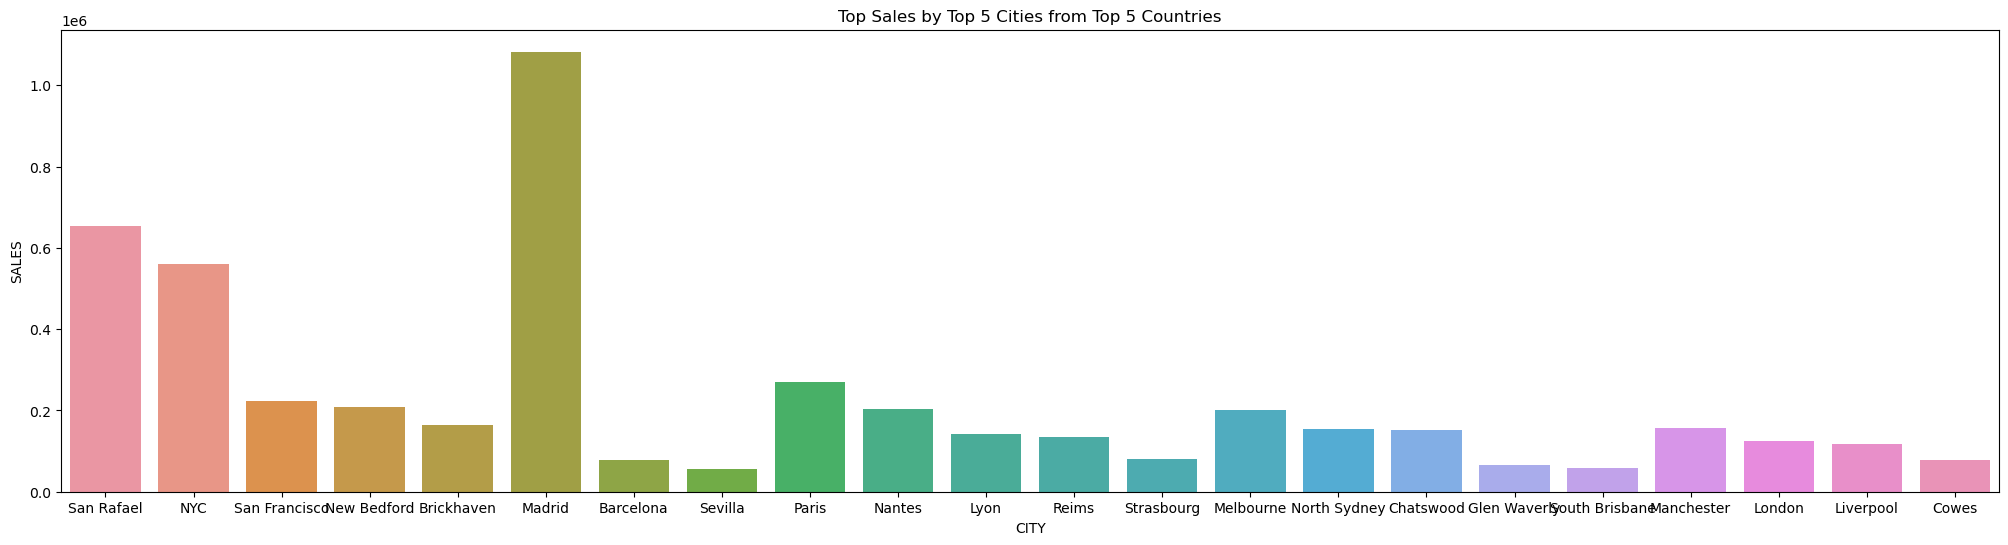

In [68]:
plt.figure(figsize=(25,6))
sns.barplot(x = 'CITY', y='SALES', data=top_cities_country)
plt.title('Top Sales by Top 5 Cities from Top 5 Countries')
plt.show()

This latest graph gives us great insight into which cities in which countries to target.  
Madrid in Spain is the top performing by sales of all cities, we would want to focus efforts there.

In [69]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year Month
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium,2003-10


In [70]:
#we look for seasonality now
#convert order date to date format
sales['Year Month'] = sales['ORDERDATE'].dt.to_period('M')

In [71]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year Month
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium,2003-10


In [72]:
monthly_sales = sales.groupby('Year Month')['SALES'].sum().reset_index()
monthly_sales.head(10)

,Year Month,SALES
0,2003-01,129753.60
1,2003-02,140836.19
2,2003-03,174504.90
3,2003-04,201609.55
4,2003-05,192673.11
5,2003-06,168082.56
6,2003-07,187731.88
7,2003-08,197809.30
8,2003-09,263973.36
9,2003-10,568290.97


In [73]:
monthly_sales.dtypes
monthly_sales['Year Month'] = monthly_sales['Year Month'].dt.to_timestamp()

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


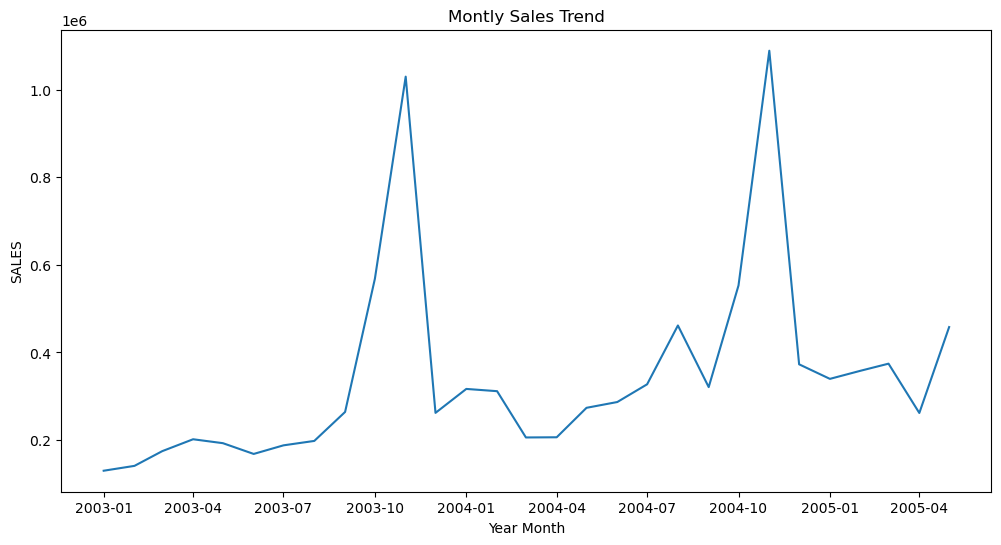

In [74]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year Month', y='SALES', data = monthly_sales)
plt.title('Montly Sales Trend')
plt.show()

We can see November is peak time for sales. Q1 generally very weak.